In [618]:
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import Tree
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score as acs
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [619]:
df=pd.read_csv("../Dataset/twitter_parsed_dataset.csv")

In [620]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [621]:
df

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [622]:
df['oh_label'].value_counts()

0.0    11501
1.0     5347
Name: oh_label, dtype: int64

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16851 entries, 0 to 16850
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16851 non-null  object 
 1   id          16850 non-null  object 
 2   Text        16850 non-null  object 
 3   Annotation  16848 non-null  object 
 4   oh_label    16848 non-null  float64
dtypes: float64(1), object(4)
memory usage: 658.4+ KB


In [624]:
df.isna().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [625]:
df.dropna(inplace=True)

In [626]:
df_new = df.copy()

In [627]:
x_df=df_new[df_new['Text']=='']

In [628]:
x_df

,index,id,Text,Annotation,oh_label


## 2. 1 lower case

In [629]:

df_new

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [630]:
import re
def lower_func(x):
    return x.strip().lower()
def remove_url(x):
 result = re.sub(r'http\S+', '', x)
 return result

def remove_hashtag(x):
 result = re.sub(r'#\S+', '', x)
 return result

def remove_mentions(x):
 result = re.sub(r'@\S+', '', x)
 return result

def remove_punc_func(x):
    new = ''
    for a in x:
        if a not in string.punctuation:
            new = new + a
        else :
            new = new +' '
    return new


## 2.2 Remove special characters
def remove_emojis(x):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    result = emoji_pattern.sub(r'', x)
    return result

def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
        else :
            new = new +' '
    return new

def remove_html(x):
    c = re.compile(r'<.*?>')
    result=re.sub(c,'',x)
    return result

In [631]:
def clean_text(x):
    x= lower_func(x)
    x=remove_url(x)
    x=remove_hashtag(x)
    x=remove_mentions(x)
    x=remove_punc_func(x)
    x=remove_emojis(x)
    x=remove_spec_char_func(x)
    x=remove_html(x)
    return x

In [632]:
df_new['Clean_Text']=df_new['Text'].apply(lambda x: clean_text(x))
df_new.head(20)

,index,id,Text,Annotation,oh_label,Clean_Text
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,i read them in context no change in meaning...
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,now you idiots claim that people who tried to...
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,rt call me sexist but when i go to an auto p...
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,wrong isis follows the example of mohammed a...
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0,no no no no no no
5,5.61184804004041E+017,5.61184804004041E+017,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,none,0.0,rt saudi preacher who raped and tortured h...
6,4.36563082093949E+017,4.36563082093949E+017,RT @Millhouse66 @Maureen_JS nooo not sexist bu...,sexism,1.0,rt nooo not sexist but most women are bad dr...
7,5.75962326454641E+017,5.75962326454641E+017,Going to make some pancakes.....Don't hve any ...,none,0.0,going to make some pancakes don t hve any ...
8,5.72581510248706E+017,5.72581510248706E+017,RT @ahtweet: @freebsdgirl How dare you have fe...,none,0.0,rt how dare you have feelings is a fantastic...
9,5.00456367719989E+017,5.00456367719989E+017,RT @Newmanzaa: There's something wrong when a ...,sexism,1.0,rt there s something wrong when a girl wins w...


## 2.3 Remove stopwords

In [633]:
nltk.download('words')
english_corpus=set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [634]:
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)
df_new['Clean_Text']= df_new['Clean_Text'].apply(lambda x: remove_stopwords(x))


In [635]:
def keep_eng_words(x):
    result =' '.join([w for w in nltk.wordpunct_tokenize(x) if w in english_corpus or not w.isalpha()])
    return result
df_new['Clean_Text']= df_new['Clean_Text'].apply(lambda x: keep_eng_words(x))

In [636]:
x_df=df_new[df_new['Clean_Text']=='']

In [637]:
x_df['oh_label'].value_counts()

0.0    654
1.0     85
Name: oh_label, dtype: int64

In [638]:
df_new=df_new[df_new['Clean_Text']!='']

In [639]:
df_new

,index,id,Text,Annotation,oh_label,Clean_Text
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,read context change meaning history slavery
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,claim people tried stop becoming terrorist mad...
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,call go auto place rather talk guy
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,wrong example exactly
5,5.61184804004041E+017,5.61184804004041E+017,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,none,0.0,preacher tortured five year old daughter death
...,...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0,feeling sorry safe kat going home
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0,pretty good happy well never eating place
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0,lemon tart please go one season without someon...
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0,stupid talk blocked


In [640]:
ps = PorterStemmer()
def stemming(x):
    x = [ps.stem(word) for word in x.split()]
    x= ' '.join(x)
    return x

In [641]:
from nltk.corpus import wordnet
def get_pos(x):
    treebank_tag=nltk.pos_tag(x[0][1])
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else :
        return ''

In [642]:
lm = WordNetLemmatizer()
def lemmatizing(x):
    x = [lm.lemmatize(word,get_pos(word)) for word in x.split()]
    return x

In [643]:
from textblob import TextBlob
def spellchecker(x):
    x =str(TextBlob(x).correct())
    return x

In [644]:
def correct_text(text,stem=False,lem=False,spell_check=False):
    if stem and lem:
        print("either of stem or lem can be True")
    else:
        if stem:
            text = stemming(text)
        if lem:
            text = lemmatizing(text)
        if spell_check:
            text= spellchecker(text)
    return text

In [645]:
df_new['Correct_Text']= df_new['Clean_Text'].apply(lambda x:correct_text(x,stem=True))

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17484\1257372248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Correct_Text']= df_new['Clean_Text'].apply(lambda x:correct_text(x,stem=True))


In [646]:
df_new

,index,id,Text,Annotation,oh_label,Clean_Text,Correct_Text
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,read context change meaning history slavery,read context chang mean histori slaveri
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,claim people tried stop becoming terrorist mad...,claim peopl tri stop becom terrorist made terr...
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,call go auto place rather talk guy,call go auto place rather talk guy
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,wrong example exactly,wrong exampl exactli
5,5.61184804004041E+017,5.61184804004041E+017,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,none,0.0,preacher tortured five year old daughter death,preacher tortur five year old daughter death
...,...,...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0,feeling sorry safe kat going home,feel sorri safe kat go home
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0,pretty good happy well never eating place,pretti good happi well never eat place
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0,lemon tart please go one season without someon...,lemon tart pleas go one season without someon ...
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0,stupid talk blocked,stupid talk block


## Feature Extraction and EDA

In [647]:
df_new['word_count']=df_new['Correct_Text'].apply(lambda x:len(str(x).split()))

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17484\3327572549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['word_count']=df_new['Correct_Text'].apply(lambda x:len(str(x).split()))


In [648]:
df_new[['Correct_Text','word_count']]

,Correct_Text,word_count
0,read context chang mean histori slaveri,6
1,claim peopl tri stop becom terrorist made terr...,10
2,call go auto place rather talk guy,7
3,wrong exampl exactli,3
5,preacher tortur five year old daughter death,7
...,...,...
16846,feel sorri safe kat go home,6
16847,pretti good happi well never eat place,7
16848,lemon tart pleas go one season without someon ...,10
16849,stupid talk block,3


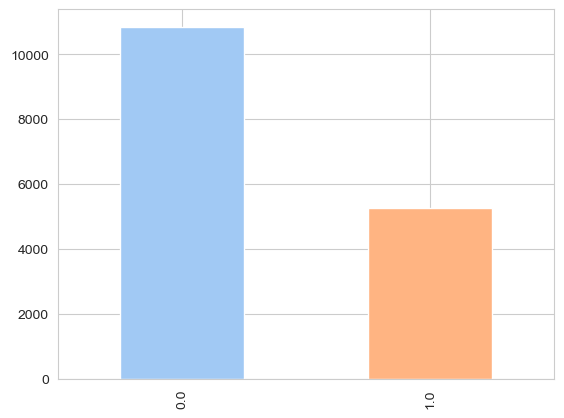

In [649]:
df_new['oh_label'].value_counts().plot(kind='bar',color=sns.color_palette('pastel'))
plt.show()

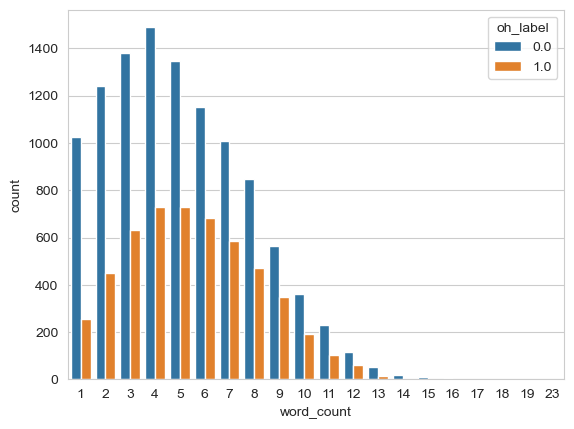

In [650]:
sns.axisgrid=False
df_new.columns=df_new.columns.str.lower()
sns.countplot(x=df_new['word_count'],hue=df_new['oh_label'])
plt.show()

In [651]:
def avg_word_count(x):
    words=x.split()
    sum =0
    for word in words:
        sum += len(word)
    avg_words= sum/len(words)
    return avg_words
df_new['avg_words']=df_new["correct_text"].apply(lambda x:avg_word_count(x)).round(1)
df_new['char_count']=df_new["correct_text"].str.len()


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17484\4205405337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['avg_words']=df_new["correct_text"].apply(lambda x:avg_word_count(x)).round(1)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17484\4205405337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['char_count']=df_new["correct_text"].str.len()


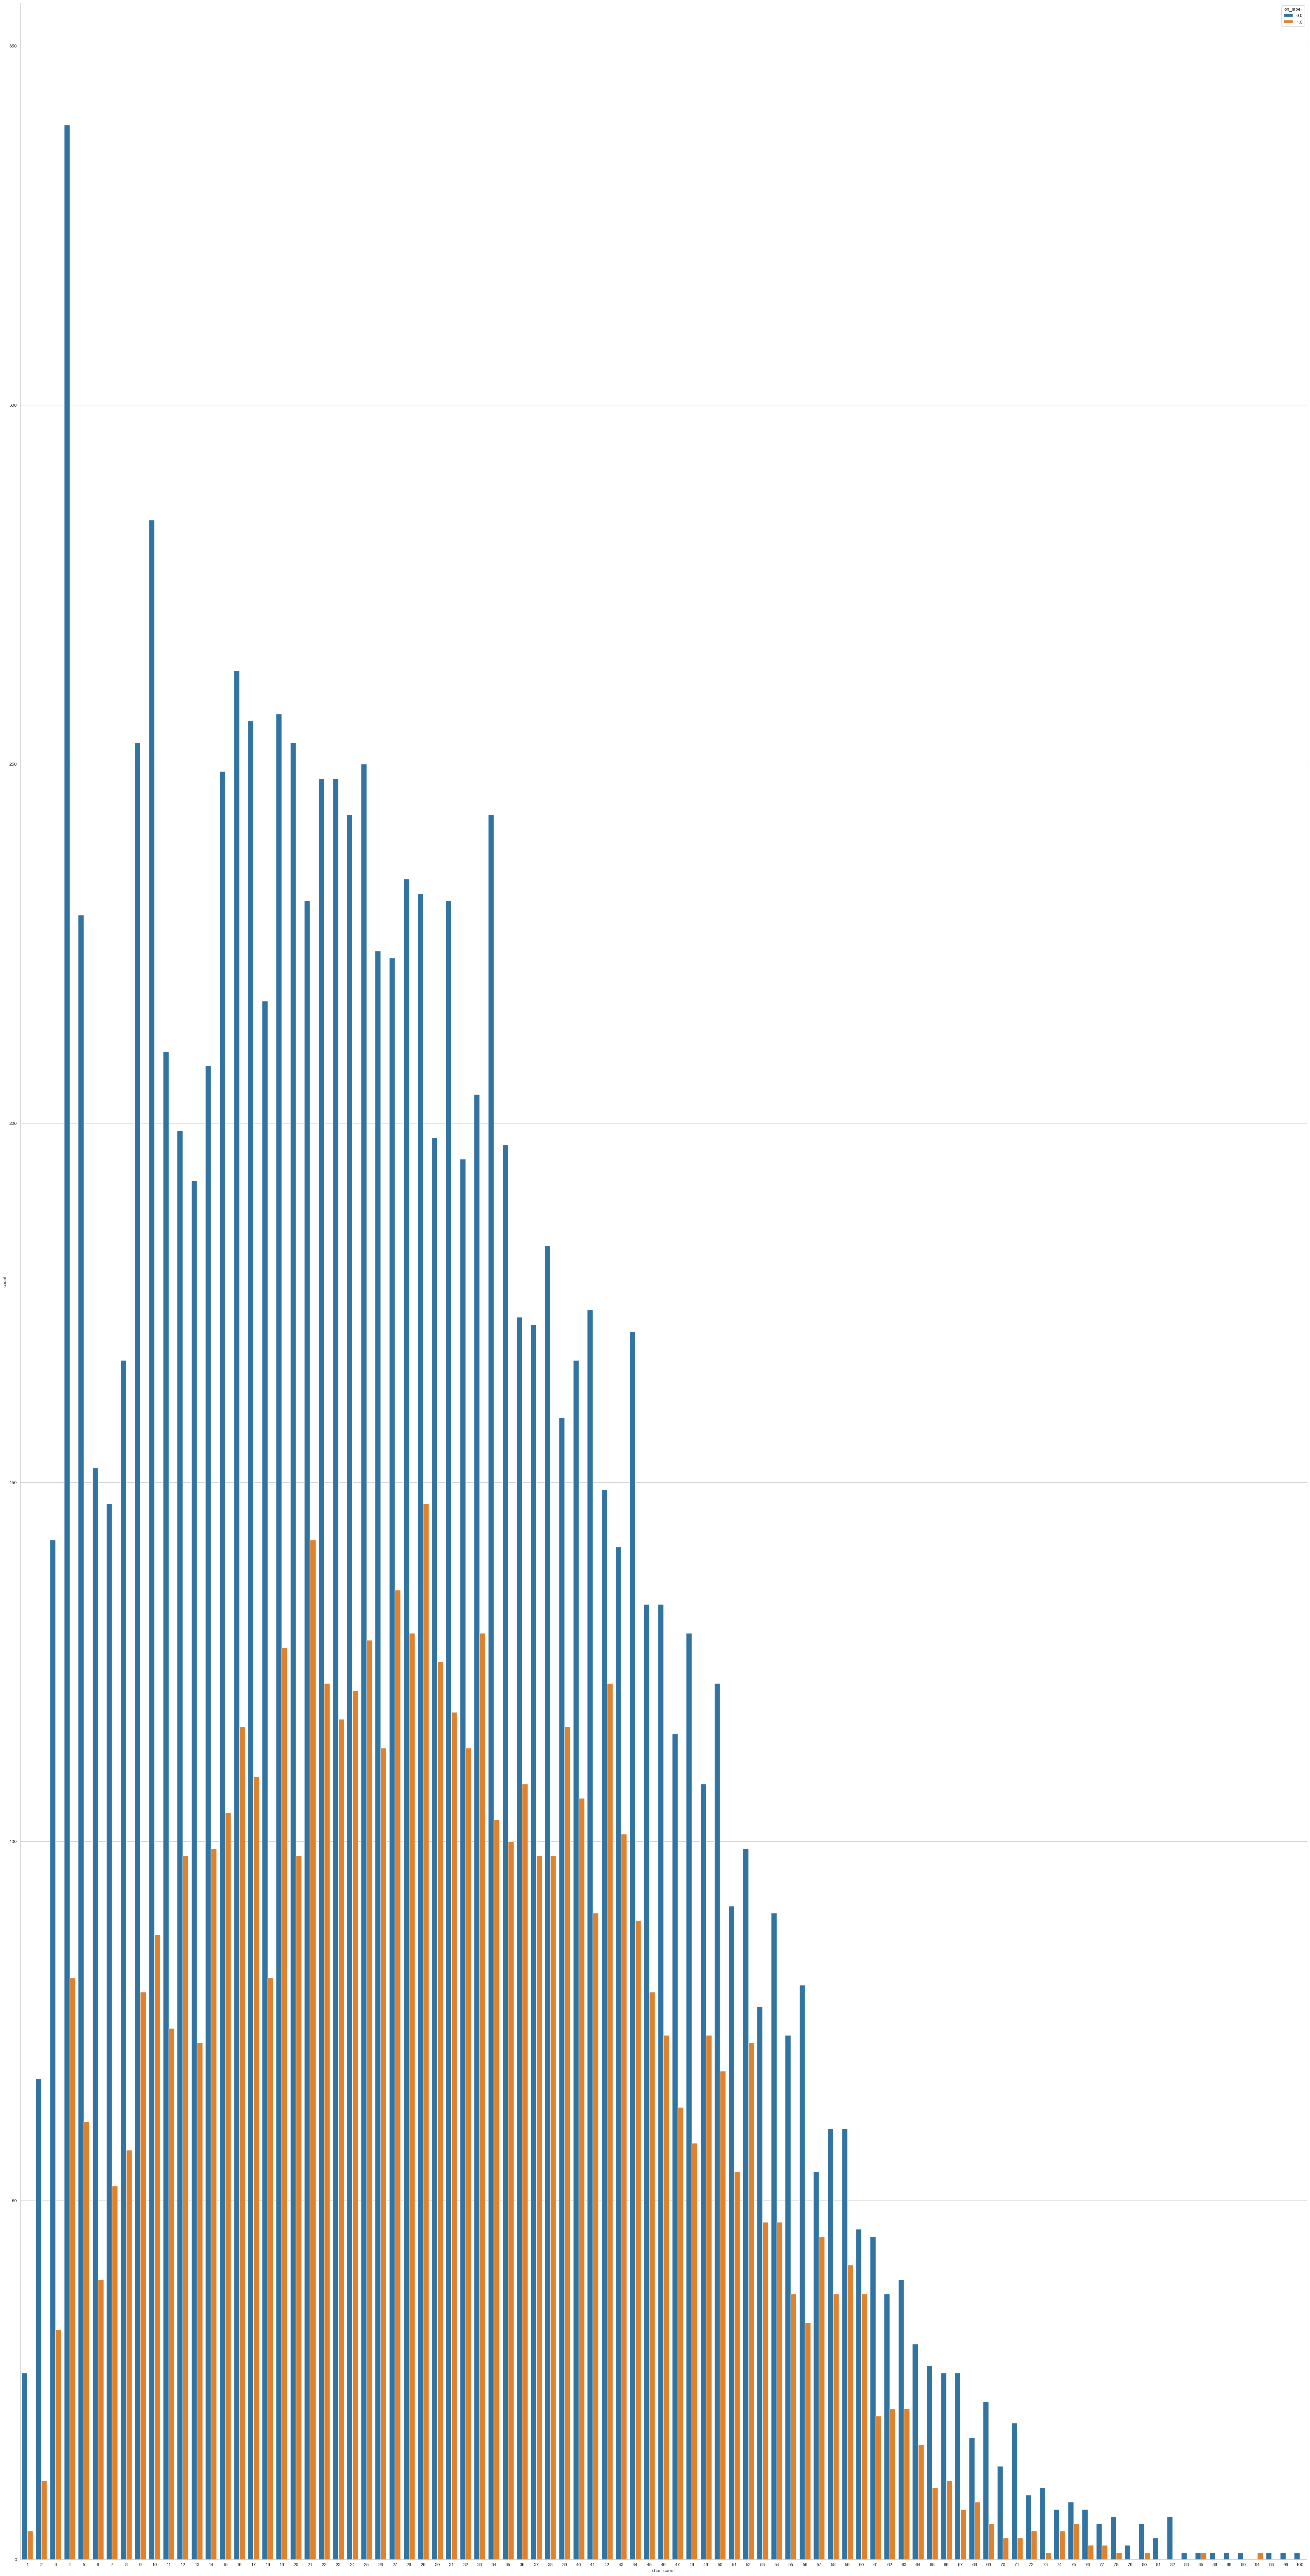

In [652]:
plt.figure(figsize=(50,100))
sns.countplot(x=df_new['char_count'],hue=df_new['oh_label'])
plt.show()

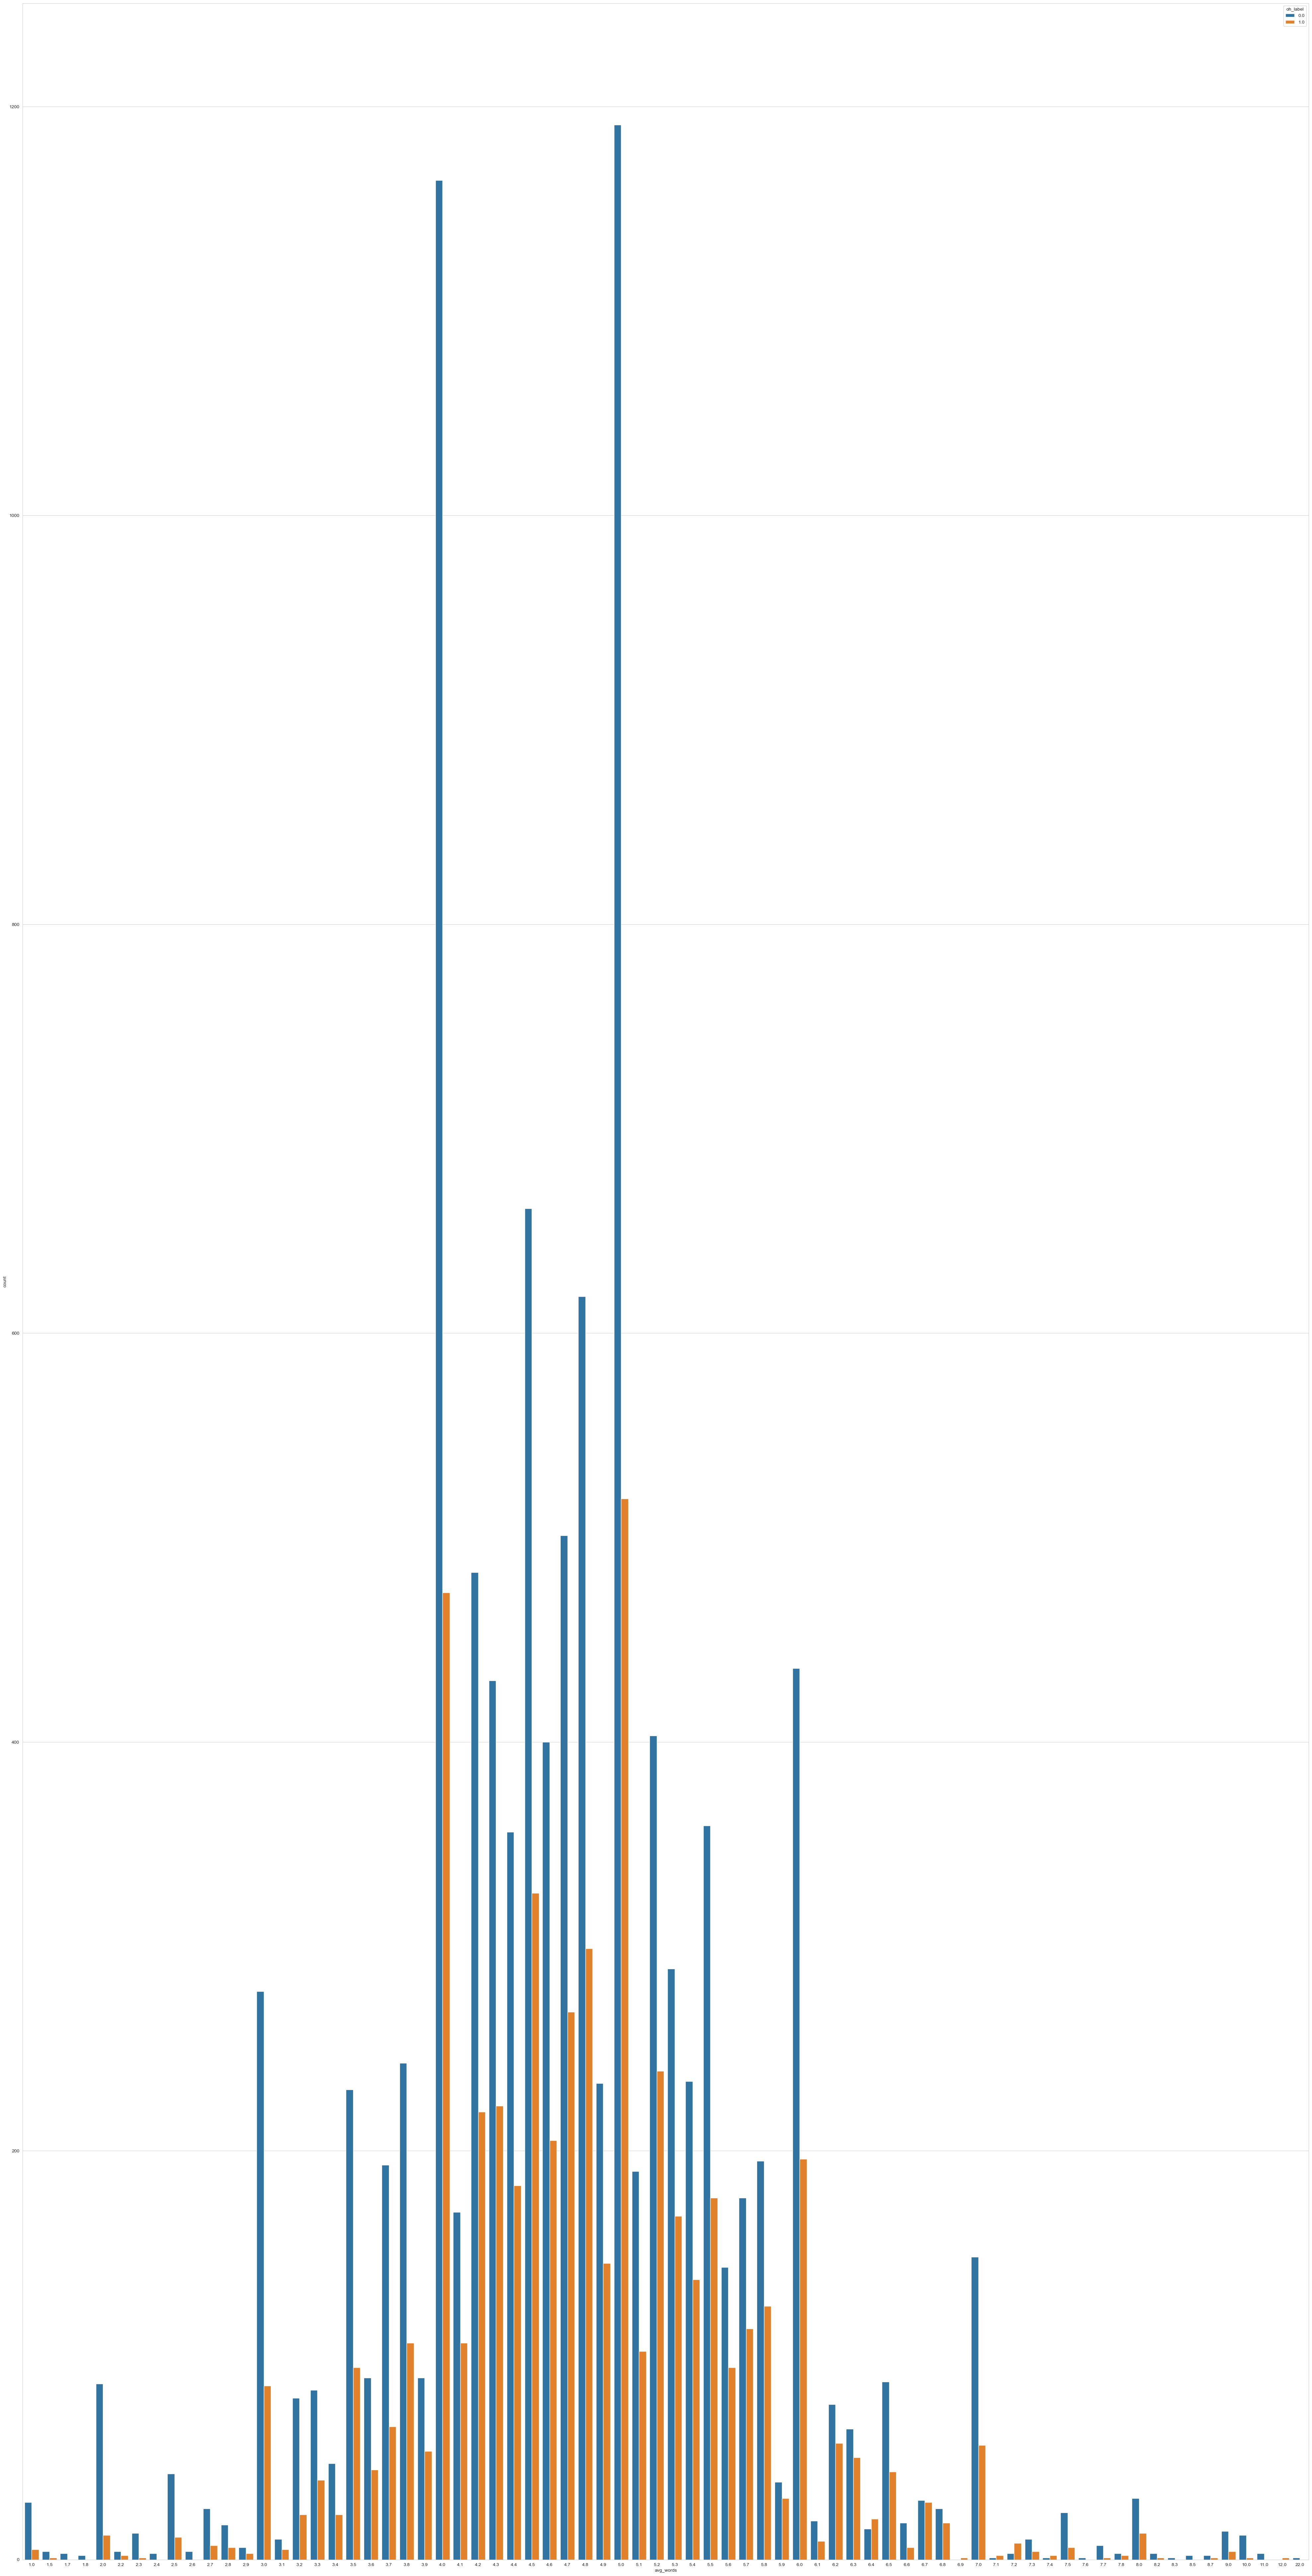

In [653]:
plt.figure(figsize=(50, 100))
sns.countplot(x=df_new['avg_words'], hue=df_new['oh_label'])
plt.show()

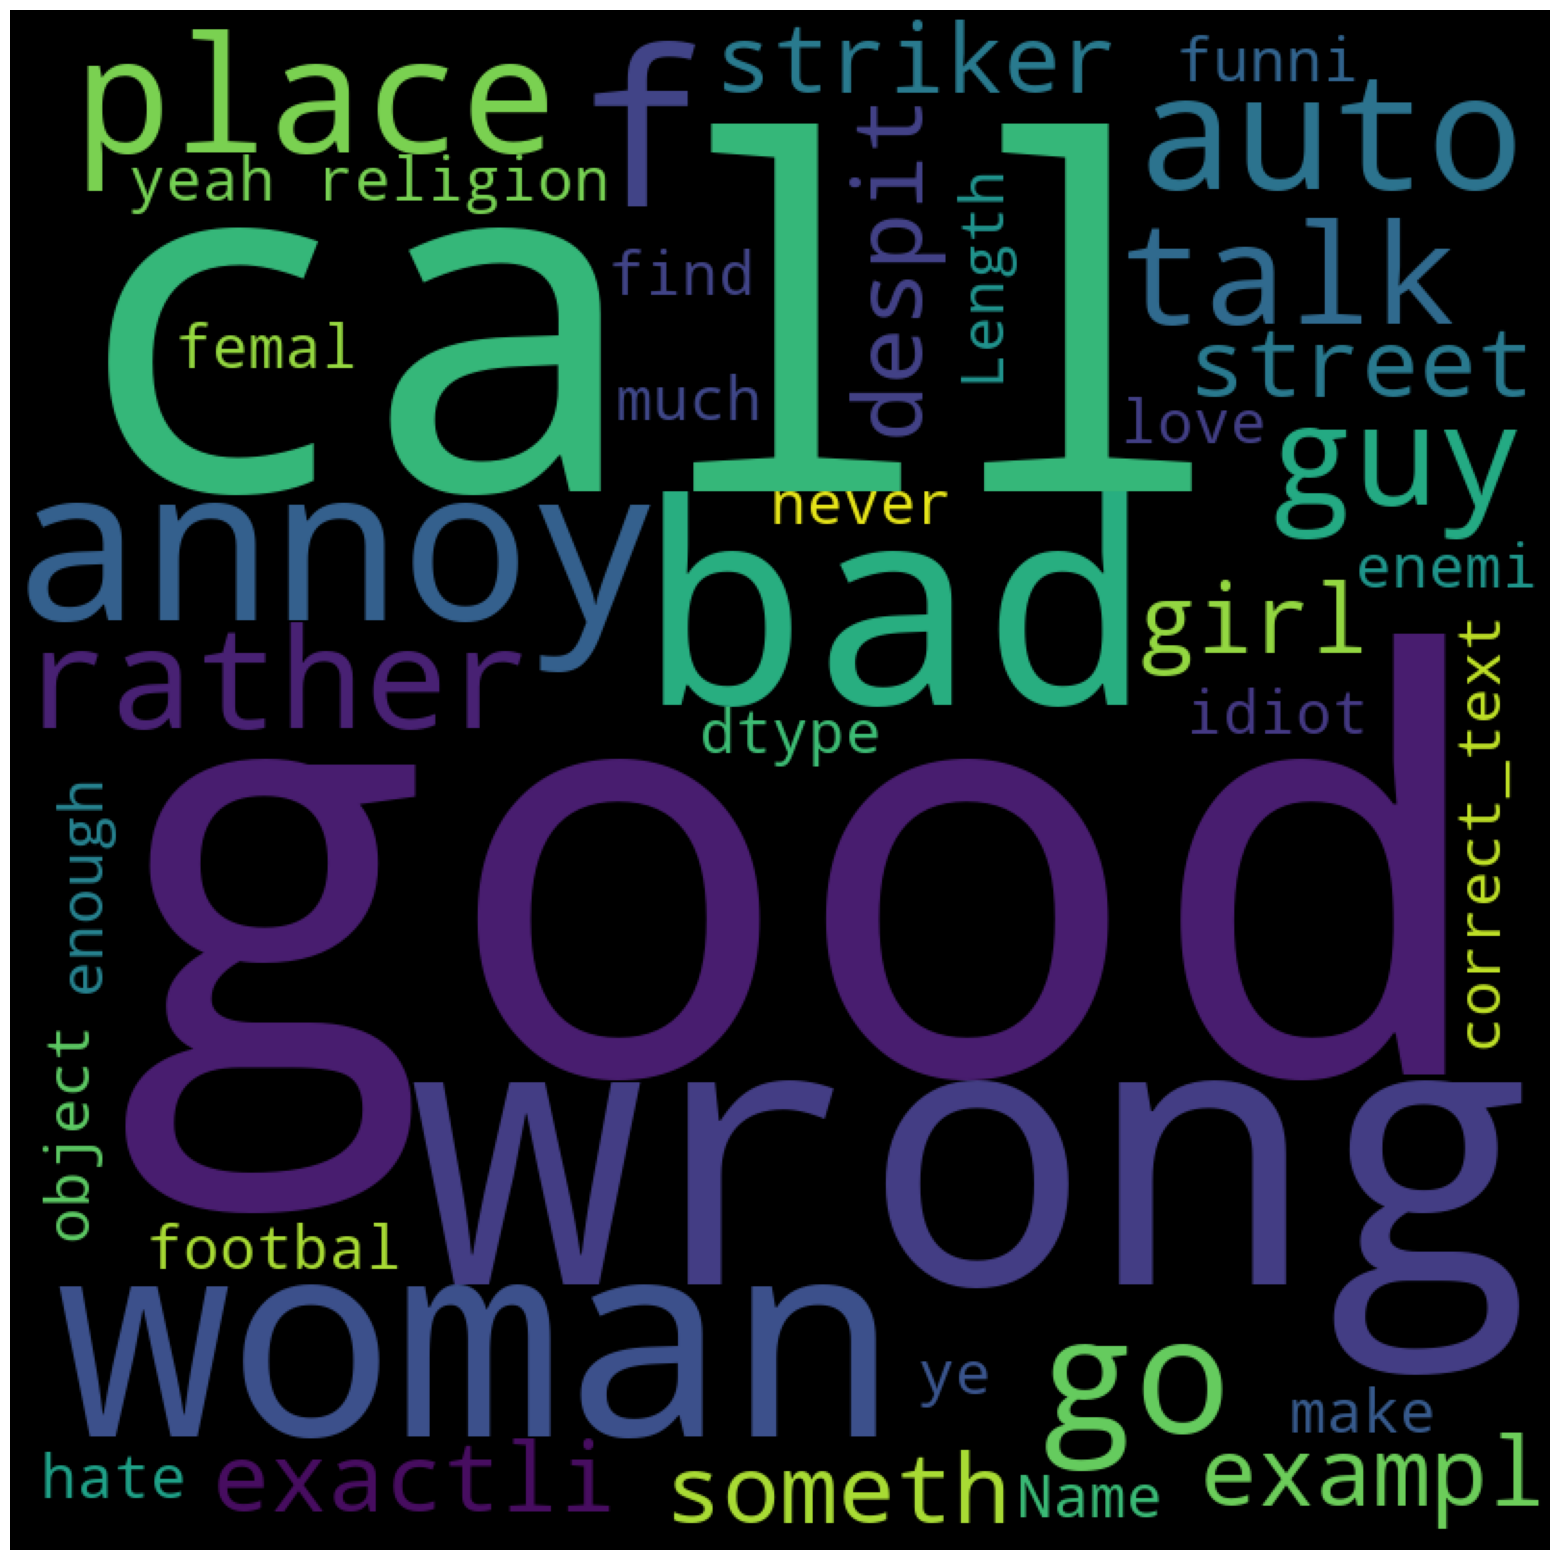

In [654]:
from wordcloud import WordCloud

words=str(df_new[df_new['oh_label']==1]['correct_text'])
wordcloud=WordCloud(width=800,height=800,min_font_size=8).generate(words)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Modelling

In [655]:
df_new.drop(['index','id','text','clean_text','annotation'],axis=1,inplace=True)
X=df_new.drop('oh_label',axis=1)
y=df_new['oh_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
X_train

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17484\2401129047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['index','id','text','clean_text','annotation'],axis=1,inplace=True)


,correct_text,word_count,avg_words,char_count
10231,watch ice hockey realli pain,5,4.8,28
15104,past 12 saw 1018 776 min 662 473 1519 1233 maj...,14,3.4,61
14334,person done voic opinion go get pile go give,9,4.0,44
8922,predict tonight fail,3,6.0,20
547,cold want stop wear superhero outfit,6,5.2,36
...,...,...,...,...
1846,oh bad realli realli bad sexual assault hey ba...,10,4.6,55
6254,bloodi hell mani time see peopl cook home,8,4.2,41
6726,chicken yuck,2,5.5,12
6730,kat better show quickli aw peopl,6,4.5,32


In [656]:
Z_train =X_train[['word_count','avg_words','char_count']]
Z_test =X_test[['word_count','avg_words','char_count']]
X_train=X_train["correct_text"]
X_test=X_test["correct_text"]


In [657]:
X_train

10231                         watch ice hockey realli pain
15104    past 12 saw 1018 776 min 662 473 1519 1233 maj...
14334         person done voic opinion go get pile go give
8922                                  predict tonight fail
547                   cold want stop wear superhero outfit
                               ...                        
1846     oh bad realli realli bad sexual assault hey ba...
6254             bloodi hell mani time see peopl cook home
6726                                          chicken yuck
6730                      kat better show quickli aw peopl
5130                                                  work
Name: correct_text, Length: 12887, dtype: object

In [658]:
bow=CountVectorizer(max_features=1000)
X_train_bow=bow.fit_transform(X_train)
X_test_bow =bow.transform(X_test)
X_train_bow =pd.DataFrame(X_train_bow.toarray(),columns=bow.get_feature_names())
X_test_bow =pd.DataFrame(X_test_bow.toarray(),columns=bow.get_feature_names())

C:\Users\Yogesh\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yogesh\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [616]:
X_test_bow

,000,10,100,12,14,1400,15,17,20,200,...,year,yep,yet,yo,young,yummi,zero,word_count,avg_words,char_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,5.0,29.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.0,3.8,37.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,4.7,16.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,5.0,11.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.0,4.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
12883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
12884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
12885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [661]:
X_train_bow=pd.concat([X_train_bow,Z_train.reset_index(drop=True)],axis=1)
X_test_bow=pd.concat([X_test_bow,Z_test.reset_index(drop=True)],axis=1)
X_train_bow

,000,10,100,12,14,1400,15,17,20,200,...,year,yep,yet,yo,young,yummi,zero,word_count,avg_words,char_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,4.8,28
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,3.4,61
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,4.0,44
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,6.0,20
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,5.2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,4.6,55
12883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,4.2,41
12884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,5.5,12
12885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,4.5,32


In [664]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, \
    f1_score

def plot_confusion_perf(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    Accuracy  =  accuracy_score(y_test, y_pred)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
    print(f"Accuracy Score: {Accuracy}")
    print(f"Precision: {Precision}")
    print(f"Recall: {Recall}")
    print(f"F1_score: {F1_score}")
    return disp

Accuracy Score: 0.7566728739913098
Precision: 0.7471893585103758
Recall: 0.7566728739913098
F1_score: 0.7434280474669143


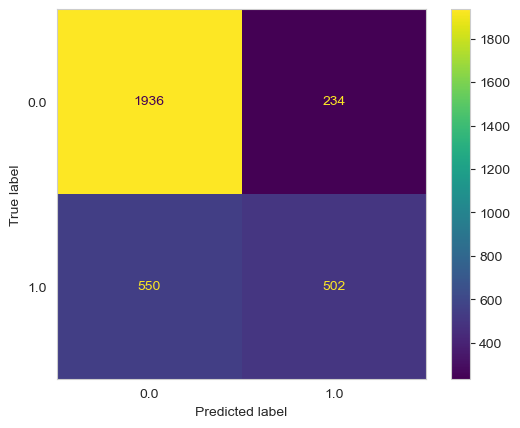

In [665]:
model_bow=MultinomialNB()
model_bow.fit(X_train_bow,y_train)
y_pred= model_bow.predict(X_test_bow)
disp =plot_confusion_perf(y_test,y_pred,model_bow)
disp.plot()
plt.grid(False)
plt.show()

In [666]:
model_bow.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Accuracy Score: 0.7408441961514587
Precision: 0.7289231022269086
Recall: 0.7408441961514587
F1_score: 0.7263197992680316


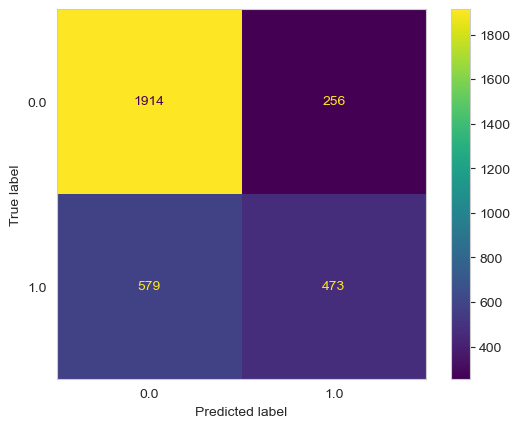

In [669]:
from sklearn.ensemble import RandomForestClassifier
model_bow_rf=RandomForestClassifier()
model_bow_rf.fit(X_train_bow,y_train)
y_pred= model_bow_rf.predict(X_test_bow)
disp =plot_confusion_perf(y_test,y_pred,model_bow_rf)
disp.plot()
plt.grid(False)
plt.show()

C:\Users\Yogesh\anaconda3\envs\NLP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Yogesh\anaconda3\envs\NLP\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:41:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7482929857231533
Precision: 0.7467187530771904
Recall: 0.7482929857231533
F1_score: 0.7178186578991582


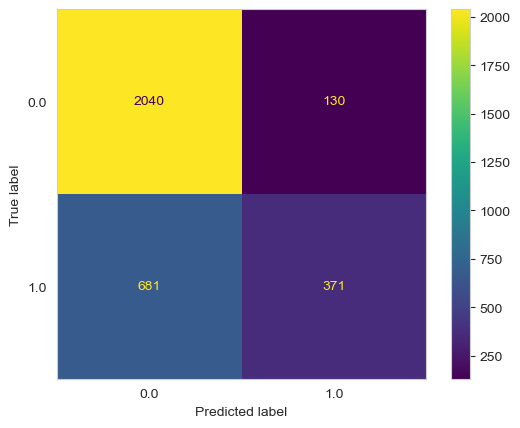

In [671]:
import xgboost as xgb

model_bow_xgb=xgb.XGBClassifier()
model_bow_xgb.fit(X_train_bow,y_train)
y_pred= model_bow_xgb.predict(X_test_bow)
disp =plot_confusion_perf(y_test,y_pred,model_bow_xgb)
disp.plot()
plt.grid(False)
plt.show()